
#1. Given a undirected graph
A graph has 12 nodes: {0,1,2,3,4,5,6,7,8,9,10,11} and the edge list: (0, 1), (0, 2), (0, 7), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11).

Question 1. Caculate the modularity of a graph with three partition: [{1, 2, 3},{4, 5, 6},{0, 7}]

Question 2. Find maximum clique in the graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

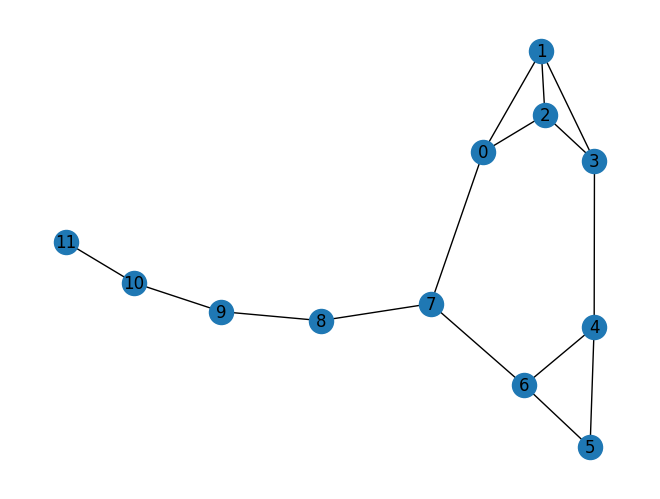

In [2]:
G = nx.Graph()


G.add_edges_from([(0, 1), (0, 2), (0, 7), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11)])

nx.draw(G, with_labels=True)

In [3]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [4]:
def modularity(G,partition):
  W=sum(G.edges[v,w].get('weight',1) for v,w in G.edges)
  summation=0
  for cluster_nodes in partition:
    s_c=sum(G.degree(n,weight='weight') for n in cluster_nodes)
    C=G.subgraph(cluster_nodes)
    W_c=sum(G.edges[v,w].get('weight',1)for v,w in C.edges)
    summation+=W_c-s_c ** 2/(4*W)

  return summation/W

In [5]:
modularity(G, partition)

0.26555555555555554

In [6]:
cliques = list(nx.find_cliques(G))
cliques
max_clique = max(cliques, key=len)
max_clique

[0, 1, 2]

#2. Read the Edge list file "football.gml", using the info file "football.txt".
To extract info, you need to import zipfile from Python and use networkX parse_gml to parse gml data into networkX.

Question 1. Compute communities using Louvain algorithm

Question 2. Visualize the communities

Question 3. Visualize the subgraphs for the communities

In [36]:
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm
import matplotlib.cm as cm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

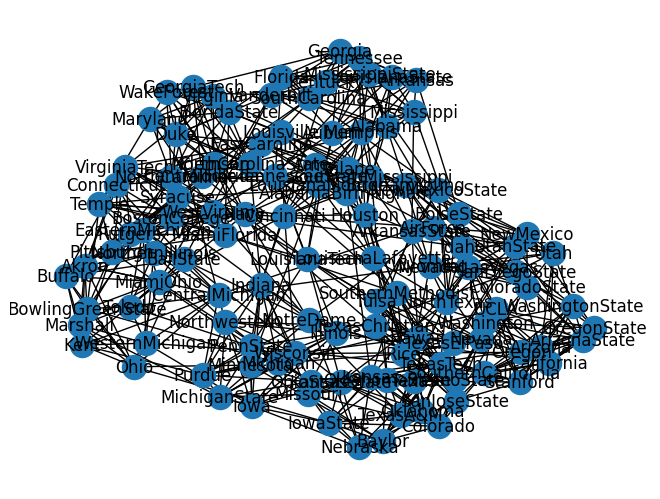

In [7]:
football_graph = nx.read_gml('football.gml')
nx.draw(football_graph,with_labels=True)

In [24]:
def create_community_node_colors(graph, communities):
    number_of_communities = len(communities)
    colors = cm.rainbow(np.linspace(0, 1, number_of_communities))

    node_colors = []
    for node in graph:
        for i, community in enumerate(communities):
            if node in community:
                rgba_color = colors[i]
                hex_color = matplotlib.colors.rgb2hex(rgba_color)
                node_colors.append(hex_color)
                break

    return node_colors

In [25]:
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

In [26]:
louvain_communities = get_louvain_communities(football_graph, random_state=1)
louvain_communities

[['BrighamYoung',
  'NewMexico',
  'SouthernCalifornia',
  'ArizonaState',
  'SanDiegoState',
  'NorthTexas',
  'Wyoming',
  'UCLA',
  'Arizona',
  'Utah',
  'ArkansasState',
  'BoiseState',
  'ColoradoState',
  'Idaho',
  'Washington',
  'Oregon',
  'NewMexicoState',
  'Stanford',
  'WashingtonState',
  'UtahState',
  'AirForce',
  'NevadaLasVegas',
  'OregonState',
  'California'],
 ['FloridaState',
  'NorthCarolinaState',
  'Virginia',
  'GeorgiaTech',
  'Duke',
  'NorthCarolina',
  'Clemson',
  'WakeForest',
  'Maryland'],
 ['Iowa',
  'PennState',
  'Northwestern',
  'Wisconsin',
  'Michigan',
  'Purdue',
  'OhioState',
  'Minnesota',
  'Illinois',
  'MichiganState',
  'Indiana'],
 ['KansasState',
  'TexasTech',
  'Baylor',
  'Colorado',
  'Kansas',
  'IowaState',
  'Nebraska',
  'TexasA&M',
  'Oklahoma',
  'Texas',
  'Missouri',
  'OklahomaState'],
 ['VirginiaTech',
  'BostonCollege',
  'WestVirginia',
  'Syracuse',
  'Pittsburgh',
  'Temple',
  'Navy',
  'NotreDame',
  'Rutgers',

In [37]:
def visualize_communities(graph, communities):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph,
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6))
    nx.draw(graph,
            pos = pos,
            node_size=100,
            node_color=node_colors,
            edge_color='blue',
            with_labels=True,
            font_size = 10,
            font_color='black')
    plt.title(title)
    plt.show()

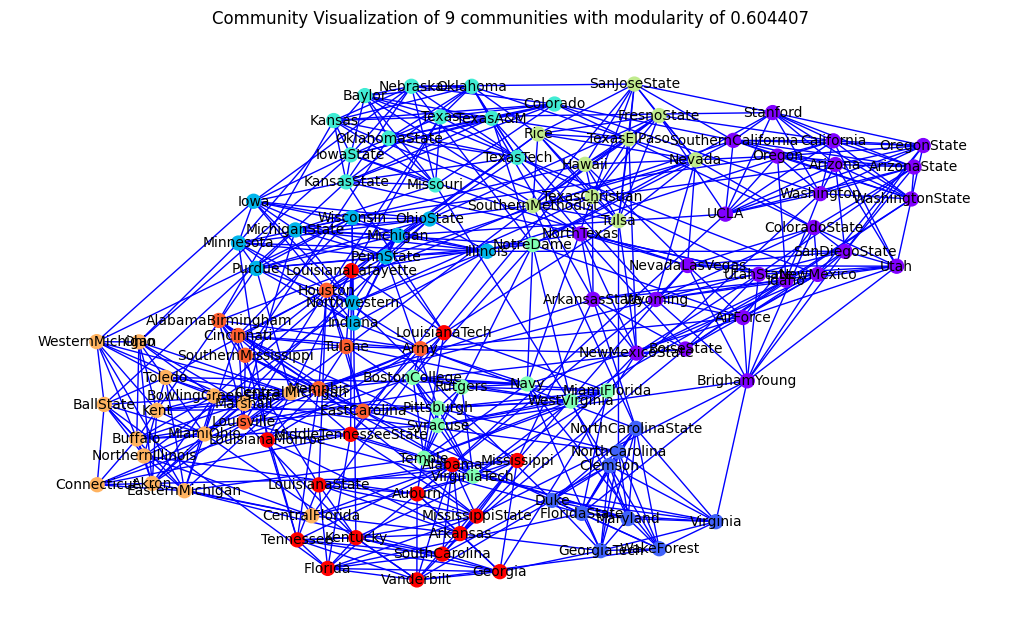

In [38]:
visualize_communities(football_graph, louvain_communities)

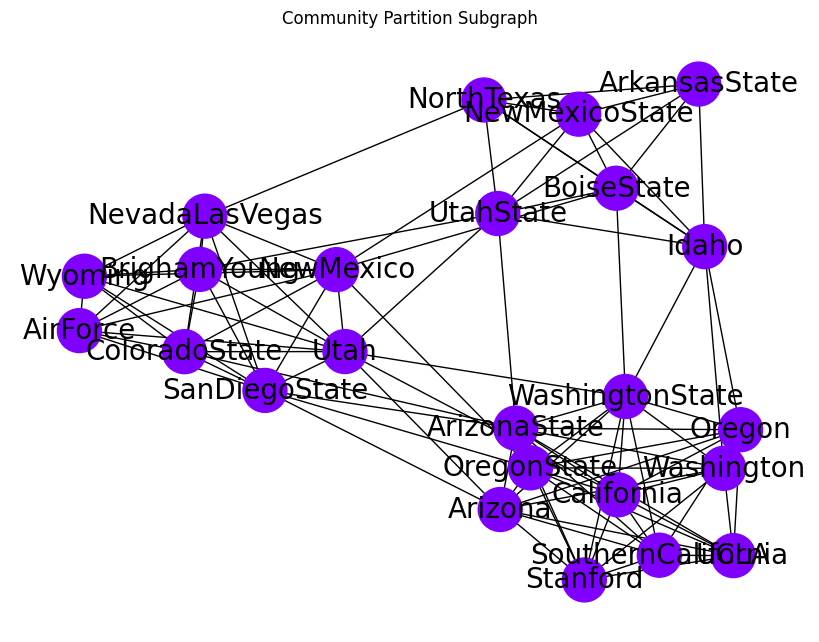

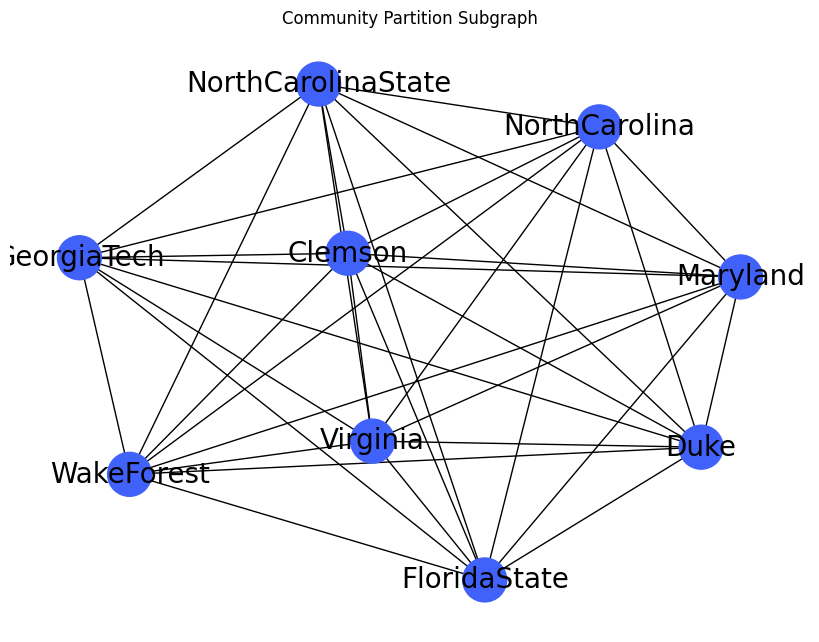

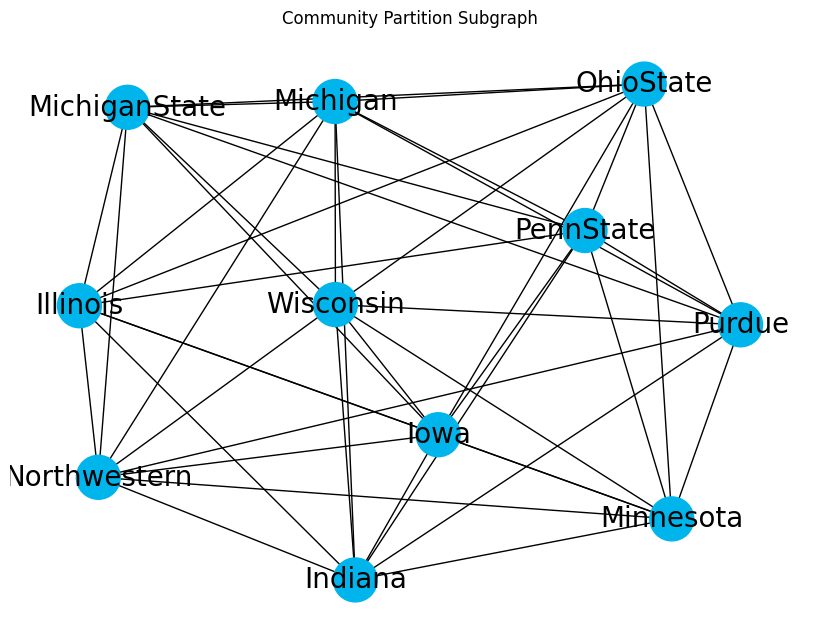

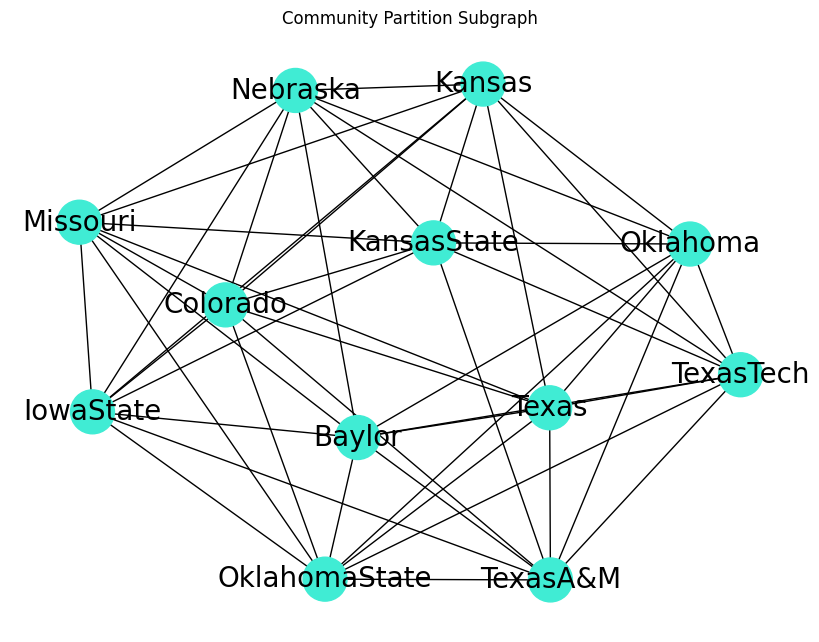

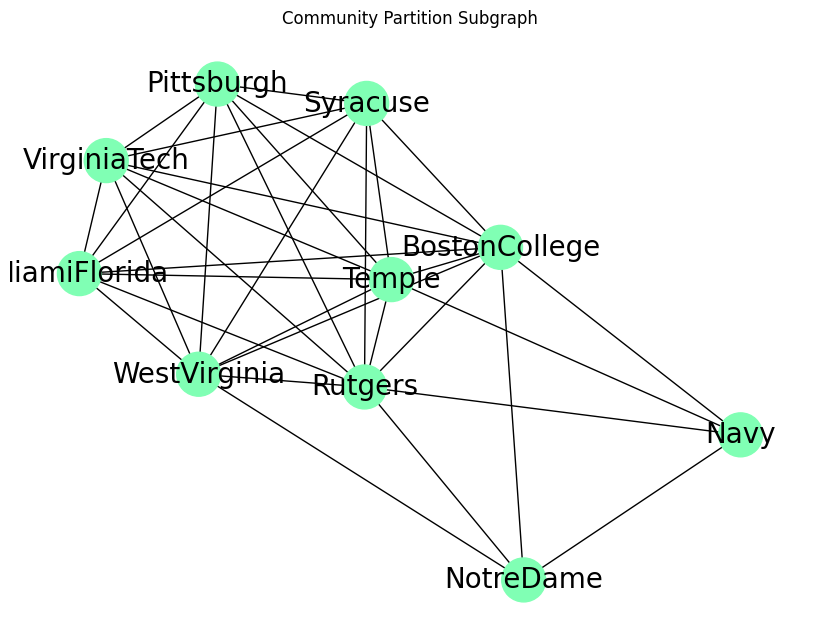

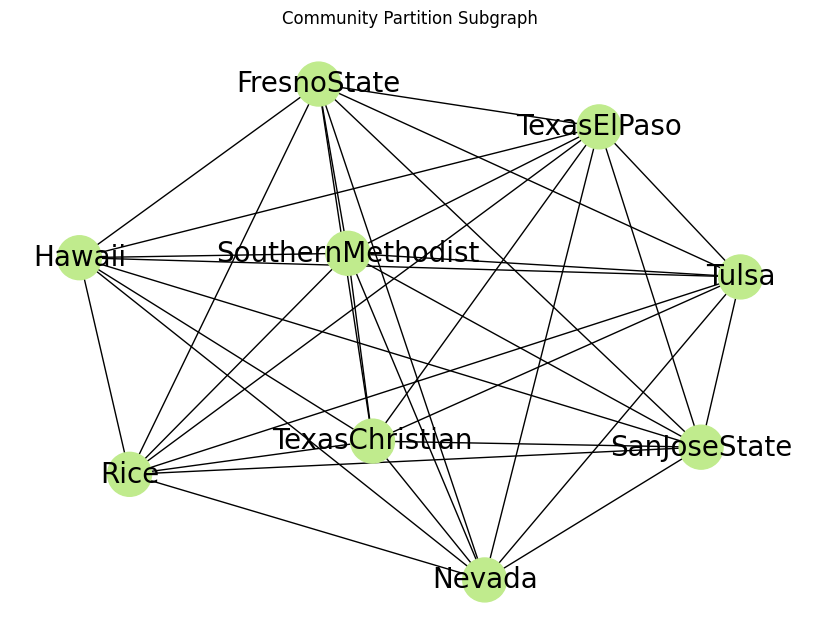

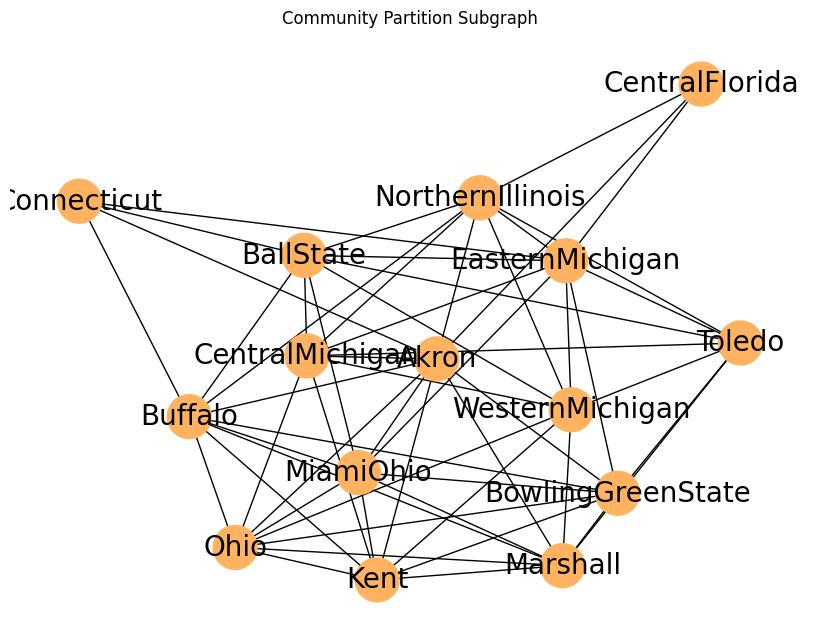

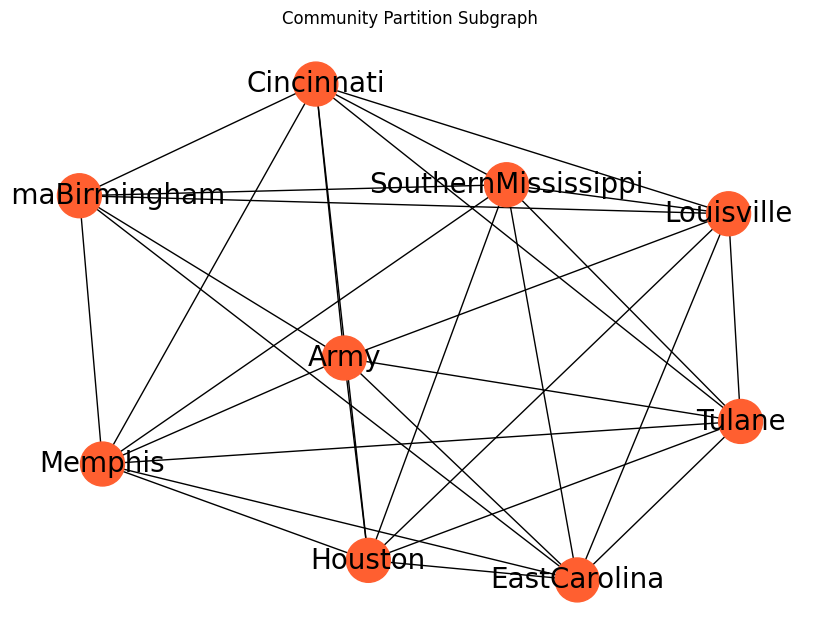

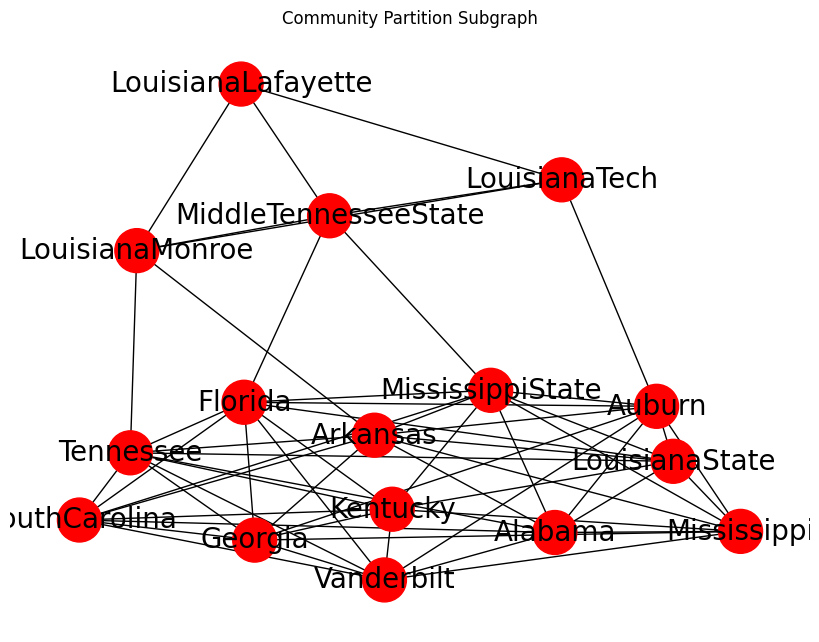

In [41]:
def visualize_subgraph(graph, subgraph_nodes, node_color):
    subgraph = nx.subgraph(graph, subgraph_nodes)
    node_colors = [node_color] * len(subgraph_nodes)
    title = "Community Partition Subgraph"
    pos = nx.spring_layout(subgraph,
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(figsize=(8,6))
    nx.draw(subgraph,
            pos=pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size=20,
            font_color='black')
    plt.title(title)
    plt.show()

num_communities = len(louvain_communities)
colors = cm.rainbow(np.linspace(0, 1, num_communities))

for i, community in enumerate(louvain_communities):
    rgba_color = colors[i]
    hex_color = matplotlib.colors.rgb2hex(rgba_color)
    visualize_subgraph(football_graph, community, hex_color)

#3. Read edge list file named: karate_edgelist.txt
Question 1. Compute the local clustering coefficient.

Question 2. Find all the nodes, which all neighbors of that node form a complete graph (fully connected to that node).

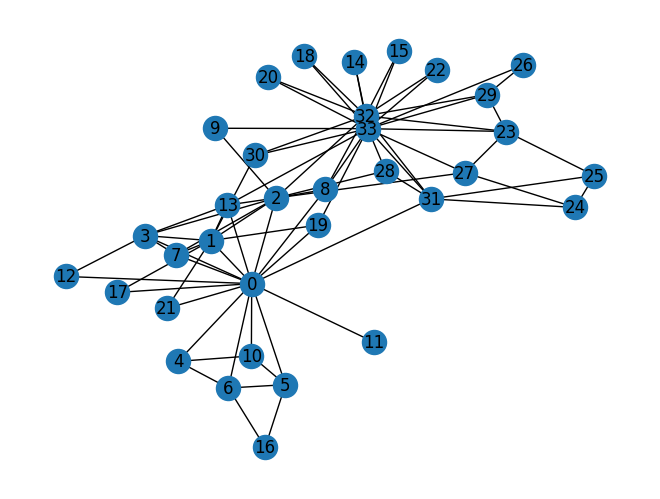

In [44]:
karate_graph = nx.read_edgelist('Karate_Edgelist.txt')
nx.draw(karate_graph,with_labels = True)

In [47]:
local_clustering_coefficient = nx.clustering(karate_graph)
print("Local Clustering Coefficient:", local_clustering_coefficient)

Local Clustering Coefficient: {'0': 0.15, '31': 0.2, '21': 1.0, '19': 0.3333333333333333, '17': 1.0, '13': 0.6, '12': 1.0, '11': 0, '10': 0.6666666666666666, '8': 0.5, '7': 1.0, '6': 0.5, '5': 0.5, '4': 0.6666666666666666, '3': 0.6666666666666666, '2': 0.24444444444444444, '1': 0.3333333333333333, '30': 0.3333333333333333, '9': 0, '32': 0.18181818181818182, '28': 0.3333333333333333, '27': 0.16666666666666666, '16': 1.0, '33': 0.10294117647058823, '14': 1.0, '15': 1.0, '18': 1.0, '20': 1.0, '22': 1.0, '23': 0.4, '29': 0.6666666666666666, '25': 0.3333333333333333, '24': 0.3333333333333333, '26': 1.0}


In [48]:
def is_complete(subgraph):
    n = len(subgraph.nodes())
    complete_graph_edges = n*(n-1)/2
    return len(subgraph.edges()) == complete_graph_edges

nodes_forming_complete_graph = []
for node in karate_graph.nodes():
    neighbors = list(karate_graph.neighbors(node))
    if len(neighbors) > 1:
        subgraph = karate_graph.subgraph(neighbors)
        if is_complete(subgraph):
            nodes_forming_complete_graph.append(node)

print("Nodes where all neighbors form a complete graph:", nodes_forming_complete_graph)


Nodes where all neighbors form a complete graph: ['21', '17', '12', '7', '16', '14', '15', '18', '20', '22', '26']
